<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/Titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Logistic regression


In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d cities/titanic123
!unzip "/content/titanic123.zip"

Saving kaggle.json to kaggle.json
  0% 0.00/22.1k [00:00<?, ?B/s]
100% 22.1k/22.1k [00:00<00:00, 19.5MB/s]
Archive:  /content/titanic123.zip
  inflating: ChanDarren_RaiTaran_Lab2a.csv  


In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df=pd.read_csv("ChanDarren_RaiTaran_Lab2a.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [62]:
colnames=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch']
df_final=df[colnames]
df_final= pd.get_dummies(df_final, columns = ["Sex"], drop_first = True)


df_final.head()


,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [36]:
df_final= df_final.fillna(df_final["Age"].mean())
df_final.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Sex_male    0
dtype: int64

In [37]:
y=df_final["Survived"]
X=df_final.drop(["Survived"],axis=1)

**To train and validate the model, the following will be done:**

**A) Generate the model**

1) Participate the data, in the training set and test set.

2) Create a Logistic Regression model and train it with Train and Test data.

**B) Validate the model generated in A)**

1) We do Cross-Validation using K-folds with 5 splits

2) We compare the results obtained in the initial model and compare it with the cross validation results (calculating the average of each of the 5 scores) and we see that the results are similar.

3) Finally we predict on the Test Set and we will see that we also obtain good Accuracy


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)


In [77]:

modelo = linear_model.LogisticRegression()
modelo.fit(X_train,y_train)
predictions=modelo.predict(X_test)
print("score in test data",modelo.score(X_test,y_test))
print("score in train data",modelo.score(X_train,y_train))

score in test data 0.8161434977578476
score in train data 0.7829341317365269


In [85]:
#validación del modelo 
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
scores = cross_val_score(modelo, X_train, y_train, cv=kf, scoring="accuracy")
print("Media de cross_validation", scores.mean())

preds = modelo.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds) 
print("Metrica en Test", score_pred)


Media de cross_validation 0.7843676355066771
Metrica en Test 0.8161434977578476


[[115  19]
 [ 22  67]]


Text(30.5, 0.5, 'True')

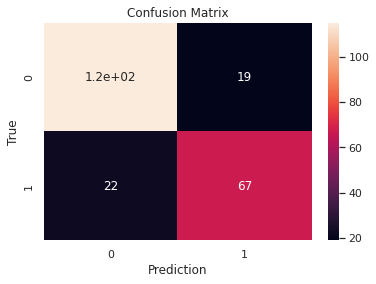

In [122]:
#MATRIZ  DECONFUSIÓN
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#sns.set()
f,ax=plt.subplots()

mat=confusion_matrix(y_test, preds)
print(mat)

sns.heatmap(mat,annot=True,ax=ax)

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Prediction') 
ax.set_ylabel('True') 

# **Conclusion**


1. The mean in the initial model and in cross validation are approximately the same, which is why the model is adequate to predict, however it should be noted that this score is probably due to the fact that the original data set is very small. 

2. About $80\%$ of the test set is predicted correctly. 



